* Who is the stakeholder

* What problem can I solve

* data is from zillow


# EDA / Data Prep

In [496]:
import pandas as pd
import matplotlib.pyplot as plt

In [497]:
df = pd.read_csv('data/Metro_sales_count_now_uc_sfrcondo_month.csv')
df.head(3)

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31
0,102001,0,United States,Country,NaN,185099.0,219079.0,241110.0,259949.0,275074.0,...,463540.0,464142.0,539662.0,498427.0,489178.0,447145.0,420659.0,402778.0,407568.0,267873.0
1,394913,1,"New York, NY",Msa,NY,8096.0,8797.0,9518.0,9797.0,10293.0,...,17864.0,17243.0,22149.0,21380.0,21096.0,18527.0,18693.0,16629.0,18380.0,15923.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,3588.0,4350.0,5163.0,5657.0,5791.0,...,11212.0,10267.0,11387.0,10453.0,9985.0,9646.0,9367.0,8774.0,8623.0,6332.0


##### Time series manipulation

In [498]:
droped_cols = ['RegionID', 'SizeRank', 'RegionType', 'StateName']
df.drop(droped_cols, axis=1, inplace=True)
df.set_index('RegionName', inplace=True)
ts = df.T
ts.index = pd.to_datetime(ts.index)
ts

RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Boise City, ID","Toledo, OH","Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Provo, UT","Durham, NC","Fort Collins, CO"
2008-02-29,185099.0,8096.0,3588.0,4870.0,5039.0,3754.0,4303.0,3797.0,4007.0,5123.0,...,578.0,172.0,310.0,452.0,518.0,499.0,559.0,293.0,450.0,247.0
2008-03-31,219079.0,8797.0,4350.0,5856.0,6102.0,4608.0,5374.0,4571.0,4412.0,5656.0,...,691.0,207.0,452.0,576.0,599.0,584.0,612.0,357.0,582.0,361.0
2008-04-30,241110.0,9518.0,5163.0,6575.0,6869.0,5512.0,5653.0,4905.0,4945.0,6182.0,...,702.0,232.0,589.0,563.0,655.0,608.0,795.0,382.0,609.0,418.0
2008-05-31,259949.0,9797.0,5657.0,6641.0,7115.0,5418.0,5965.0,5318.0,4905.0,5942.0,...,760.0,269.0,718.0,521.0,706.0,672.0,833.0,409.0,785.0,488.0
2008-06-30,275074.0,10293.0,5791.0,7735.0,7304.0,6059.0,6437.0,6372.0,4860.0,6441.0,...,797.0,281.0,873.0,578.0,631.0,606.0,948.0,404.0,864.0,529.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,447145.0,18527.0,9646.0,16004.0,9662.0,10352.0,9368.0,9431.0,9965.0,9946.0,...,1521.0,NaN,914.0,1400.0,NaN,1703.0,1353.0,NaN,890.0,NaN
2021-10-31,420659.0,18693.0,9367.0,13794.0,9157.0,9447.0,8711.0,9712.0,9494.0,9611.0,...,1466.0,NaN,NaN,1275.0,NaN,1671.0,1334.0,NaN,898.0,NaN
2021-11-30,402778.0,16629.0,8774.0,11320.0,8686.0,8997.0,8377.0,9957.0,9713.0,8980.0,...,1361.0,NaN,767.0,NaN,NaN,1623.0,1174.0,NaN,898.0,NaN
2021-12-31,407568.0,18380.0,8623.0,10595.0,8667.0,13251.0,8923.0,9672.0,11742.0,8593.0,...,1361.0,NaN,NaN,1572.0,NaN,1907.0,1082.0,794.0,908.0,666.0


In [499]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2008-02-29 to 2022-01-31
Data columns (total 95 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   United States                       168 non-null    float64
 1   New York, NY                        160 non-null    float64
 2   Los Angeles-Long Beach-Anaheim, CA  168 non-null    float64
 3   Chicago, IL                         167 non-null    float64
 4   Dallas-Fort Worth, TX               168 non-null    float64
 5   Philadelphia, PA                    168 non-null    float64
 6   Houston, TX                         162 non-null    float64
 7   Washington, DC                      168 non-null    float64
 8   Miami-Fort Lauderdale, FL           168 non-null    float64
 9   Atlanta, GA                         168 non-null    float64
 10  Boston, MA                          168 non-null    float64
 11  San Francisco, CA         

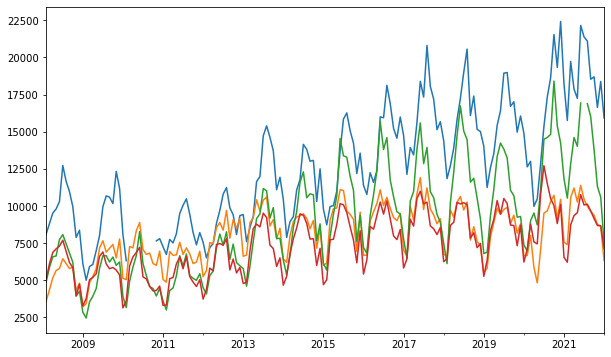

In [500]:
for x in ts.columns[1:5]:
    ts[x].plot(figsize=(10,6))

##### Data preperation - plan
* Missing Data
 * Drop cols with significant gaps
 * Interpolate data with small holes
* Non Stationary
 * Slight positive trend
 * Seasonal trends

In [501]:
max_missing_values = ts.shape[0] * .1 # 90% threshold for data
max_missing_values

16.8

In [502]:
significant_gaps = ts.isna().sum()[ts.isna().sum() > max_missing_values].index
significant_gaps

Index(['Birmingham, AL', 'Omaha, NE', 'Bakersfield, CA', 'McAllen, TX',
       'Little Rock, AR', 'Wichita, KS'],
      dtype='object', name='RegionName')

Viusalization of the incomplete data getting dropped before modeling

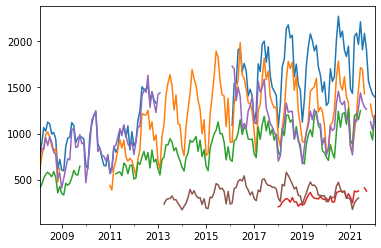

In [503]:
for x in significant_gaps:
    ts[x].plot()

In [504]:
ts.shape[1]

95

In [505]:
ts.drop(significant_gaps, axis=1, inplace=True)
ts.shape[1]

89

Visualizing the filling method for missing data that will be including in modeling

<AxesSubplot:>

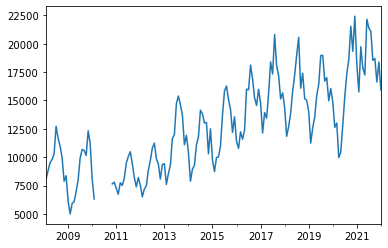

In [506]:
ts['New York, NY'].plot()

In [507]:
ts.interpolate(inplace=True)
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2008-02-29 to 2022-01-31
Data columns (total 89 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   United States                       168 non-null    float64
 1   New York, NY                        168 non-null    float64
 2   Los Angeles-Long Beach-Anaheim, CA  168 non-null    float64
 3   Chicago, IL                         168 non-null    float64
 4   Dallas-Fort Worth, TX               168 non-null    float64
 5   Philadelphia, PA                    168 non-null    float64
 6   Houston, TX                         168 non-null    float64
 7   Washington, DC                      168 non-null    float64
 8   Miami-Fort Lauderdale, FL           168 non-null    float64
 9   Atlanta, GA                         168 non-null    float64
 10  Boston, MA                          168 non-null    float64
 11  San Francisco, CA         

<AxesSubplot:>

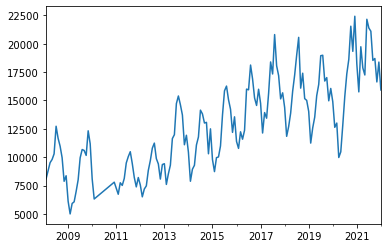

In [508]:
ts['New York, NY'].plot()

# Modeling

In [509]:
from statsmodels.tsa.arima.model import ARIMA, sarimax
from statsmodels.tsa.api import SARIMAX
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:>

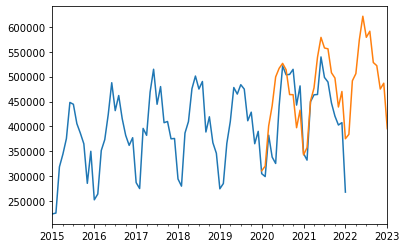

In [532]:
sarimax_test = SARIMAX(ts['United States'][:'2019'], order=(0,1,0), seasonal_order=(4,1,4,12)).fit()
sarimax_test.summary()

ts['United States']['2015':].plot()
sarimax_test.predict(start="2020", end="2023").plot()

# sarimax_test.aic

In [544]:
sarimax_err = pd.concat([ts['United States']['2020'], sarimax_test.predict(start="2020", end="2021")], axis=1)
sarimax_err['error'] = (sarimax_err['United States'] - sarimax_err['predicted_mean'])**2
rmse = sarimax_err['error'].mean()**0.5
rmse

68468.18634423526

In [511]:
def ts_comp(timeseries):
    no_null_ts = timeseries.dropna()
    
    fig, ax = plt.subplots(figsize=(16,3))
    plot_acf(no_null_ts, ax=ax);

    fig, ax = plt.subplots(figsize=(16,3))
    plot_pacf(no_null_ts, ax=ax);
    
    if adfuller(no_null_ts)[1] > 0.05:
        print('not stationary')
    else:
        print('stationary')
    
def print_arima_summary(timeseries, order=(1,1,1)):
    arima_model = ARIMA(timeseries, order=order)
    res_arima = arima_model.fit()
    print(res_arima.summary())
    return res_arima

not stationary


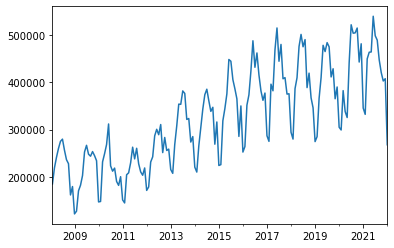

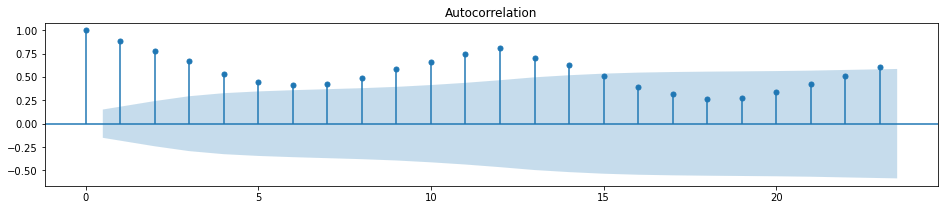

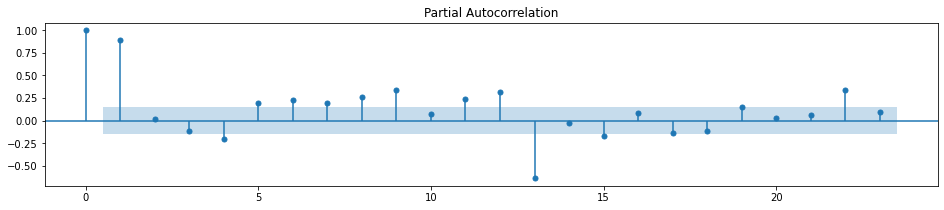

In [512]:
ts['United States'].plot()
ts_comp(ts['United States'])

stationary


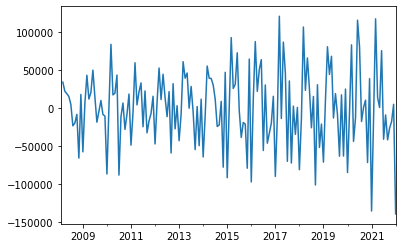

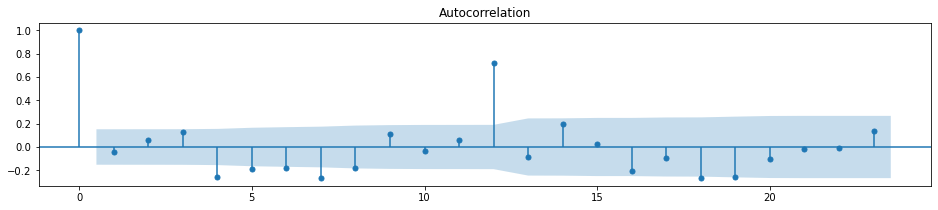

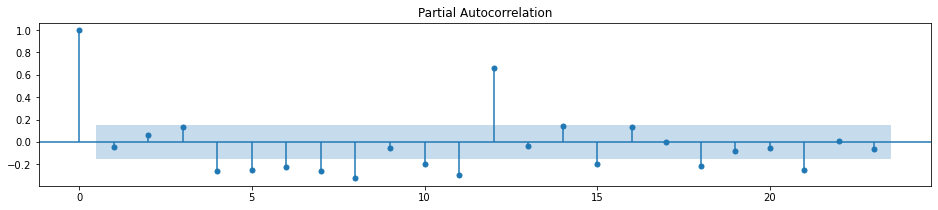

In [513]:
one_lag_diff_us = ts['United States'].diff()
one_lag_diff_us.plot()
ts_comp(one_lag_diff_us)

In [514]:
model_1 = print_arima_summary(one_lag_diff_us, (1,0,1))
model_1

                               SARIMAX Results                                
Dep. Variable:          United States   No. Observations:                  168
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2031.182
Date:                Tue, 15 Feb 2022   AIC                           4070.364
Time:                        12:18:44   BIC                           4082.860
Sample:                    02-29-2008   HQIC                          4075.435
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        495.6577   1560.705      0.318      0.751   -2563.268    3554.584
ar.L1          0.7324      0.098      7.458      0.000       0.540       0.925
ma.L1         -0.9555      0.071    -13.481      0.0

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


stationary


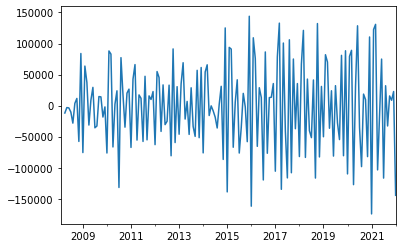

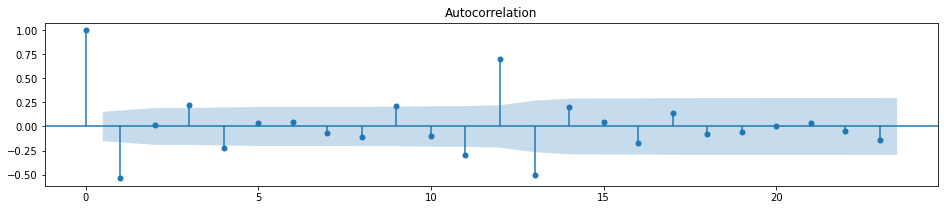

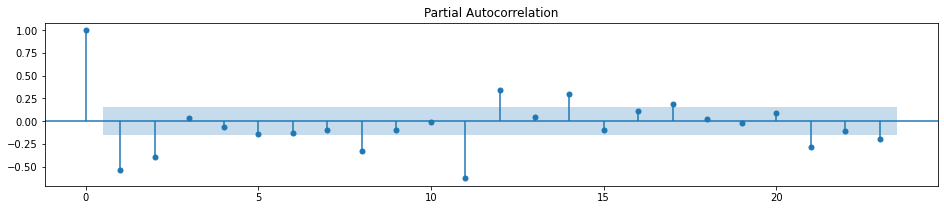

In [515]:
two_lag_diff_us = one_lag_diff_us.diff()
two_lag_diff_us.plot()
ts_comp(two_lag_diff_us)

In [516]:
model_2 = print_arima_summary(two_lag_diff_us, (3,0,2))
model_2

                               SARIMAX Results                                
Dep. Variable:          United States   No. Observations:                  168
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -2032.518
Date:                Tue, 15 Feb 2022   AIC                           4079.036
Time:                        12:18:44   BIC                           4100.904
Sample:                    02-29-2008   HQIC                          4087.911
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1046.2322   1455.581     -0.719      0.472   -3899.118    1806.654
ar.L1         -0.4055      0.401     -1.012      0.312      -1.191       0.380
ar.L2          0.1126      0.182      0.617      0.5

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


stationary


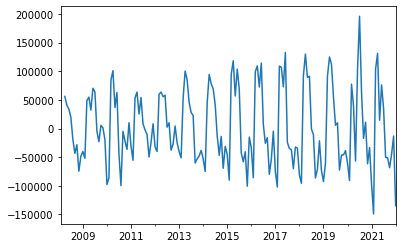

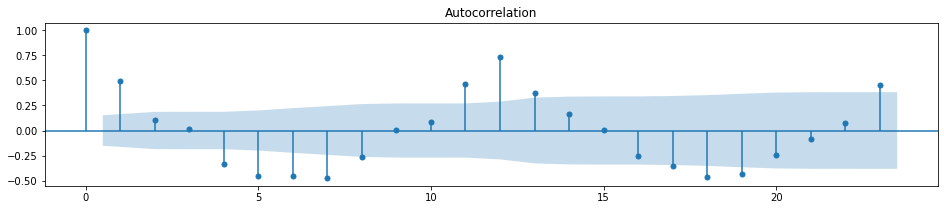

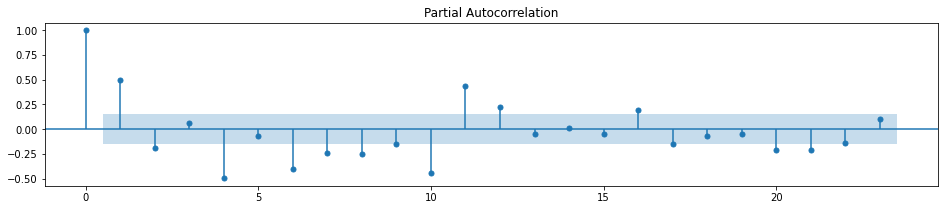

In [517]:
two_lag_diff_us_once = ts['United States'].diff(2)
two_lag_diff_us_once.plot()
ts_comp(two_lag_diff_us_once)

In [518]:
model_3 = print_arima_summary(two_lag_diff_us_once, (2,0,2))
model_3

                               SARIMAX Results                                
Dep. Variable:          United States   No. Observations:                  168
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2018.237
Date:                Tue, 15 Feb 2022   AIC                           4048.475
Time:                        12:18:44   BIC                           4067.218
Sample:                    02-29-2008   HQIC                          4056.082
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1634.1199   2765.635      0.591      0.555   -3786.425    7054.664
ar.L1          0.8330      0.128      6.497      0.000       0.582       1.084
ar.L2         -0.1397      0.139     -1.004      0.3

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


stationary


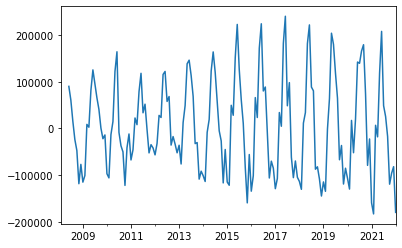

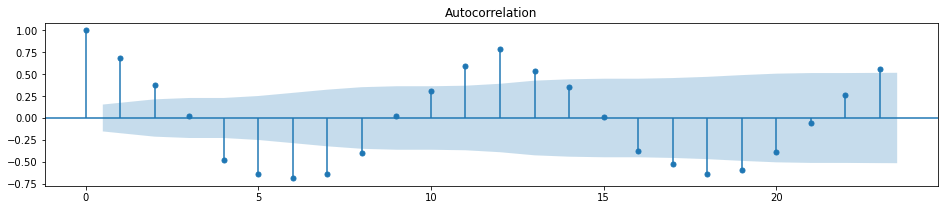

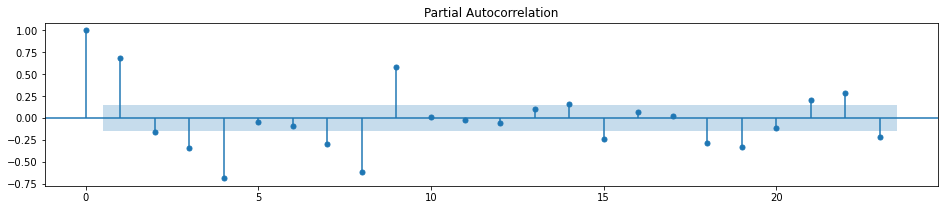

In [519]:
four_lag_diff_us_once = ts['United States'].diff(4)
four_lag_diff_us_once.plot()
ts_comp(four_lag_diff_us_once)

In [520]:
model_4 = print_arima_summary(four_lag_diff_us_once, (2,0,3))
model_4

                               SARIMAX Results                                
Dep. Variable:          United States   No. Observations:                  168
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -2016.568
Date:                Tue, 15 Feb 2022   AIC                           4047.135
Time:                        12:18:45   BIC                           4069.003
Sample:                    02-29-2008   HQIC                          4056.010
                         - 01-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3619.7624   5167.309      0.701      0.484   -6507.977    1.37e+04
ar.L1          1.4527      0.110     13.262      0.000       1.238       1.667
ar.L2         -0.7282      0.119     -6.114      0.0

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


not stationary


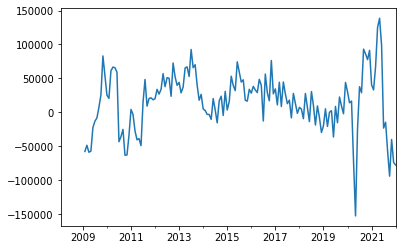

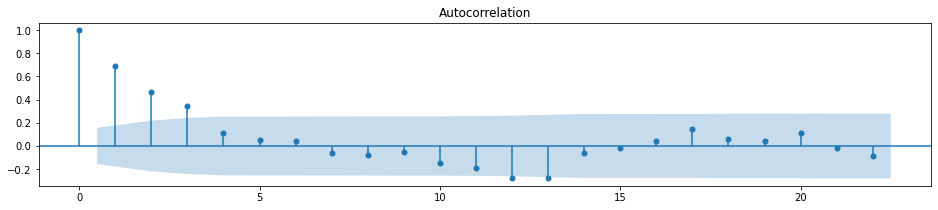

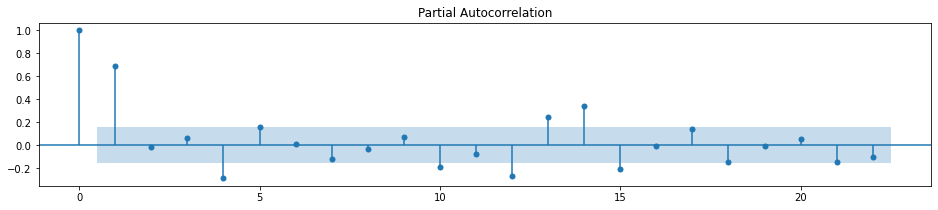

In [521]:
twelve_lag_diff_us_once = ts['United States'].diff(12)
twelve_lag_diff_us_once.plot()
ts_comp(twelve_lag_diff_us_once)

stationary


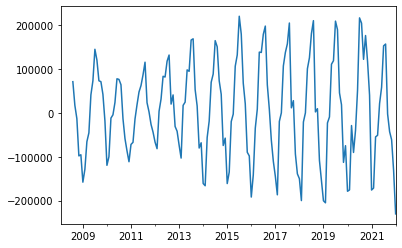

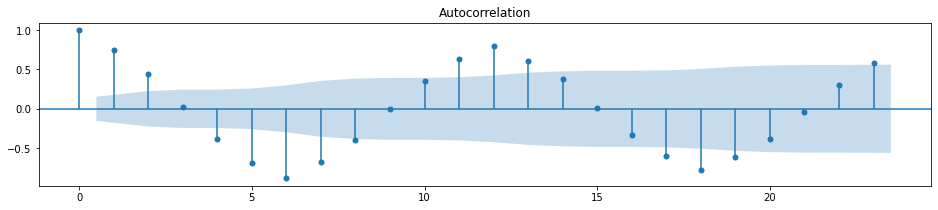

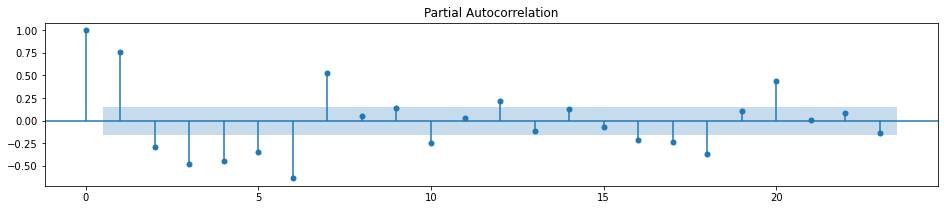

In [522]:
six_lag_diff_us_once = ts['United States'].diff(6)
six_lag_diff_us_once.plot()
ts_comp(six_lag_diff_us_once)

In [523]:
for x in [model_1, model_2, model_3, model_4]:
    print(x.aic)

4070.363817338569
4079.0361239771273
4048.4745218082007
4047.1352867796268


In [524]:
for x in [model_1, model_2, model_3, model_4]:
    print(x.bic)

4082.859673256182
4100.90387183295
4067.21830568462
4069.0030346354497


In [525]:
model_4.forecast(6)

2022-02-28    -32225.094185
2022-03-31    -32224.602156
2022-04-30     60326.765840
2022-05-31    112098.698644
2022-06-30    119913.024202
2022-07-31     93565.420694
Freq: M, Name: predicted_mean, dtype: float64

In [575]:
results = 1000000

for x in range(5):
    for y in range(1,2):
        for z in range(5):
            sample = SARIMAX(ts['United States'][:'2019'], order=(0,1,0), seasonal_order=(x,y,z,12)).fit()
#             sample.summary()
            aic = sample.aic
            
            temp_df = None
            temp_df = pd.concat([ts['United States']['2020':'2021'], sample.predict(start="2020", end="2022")], axis=1)
            temp_df['error'] = (temp_df['United States'] - temp_df['predicted_mean'])**2
            rmse = temp_df['error'].mean()**0.5
#             print(x, y, z, rmse)
            if aic < results:
                results = aic
                print(aic, x, y, z, rmse)

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


3020.4850567824406 0 1 0 67878.50595273146
3008.9852330872027 0 1 2 55770.452738953005


/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


3001.6185679129503 0 1 3 59636.15442472415


/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


3001.156987049006 1 1 4 55832.33677761753
2991.3108579775762 2 1 2 58409.383163480066
2987.271628212231 2 1 3 64870.25322157368
2984.5032040386877 3 1 2 65478.06331139837


/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:996: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [620]:
seasonal_ord = (1,1,4,12)

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


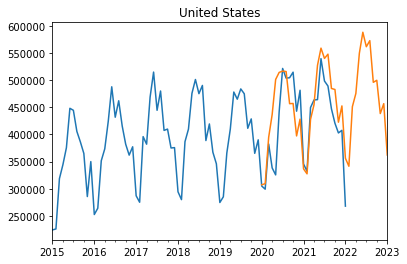

In [621]:
optimized_sm = SARIMAX(ts['United States'][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

ts['United States']['2015':].plot()
ax = optimized_sm.predict(start="2020", end="2023").plot()
ax.set_title('United States');

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


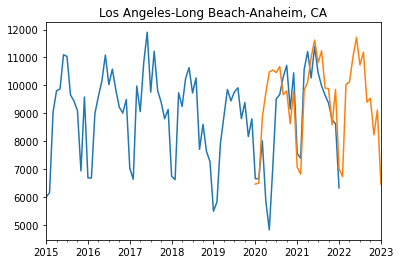

In [622]:
for x in ts.columns[2:3]:
    optimized_sm = SARIMAX(ts[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

    ts[x]['2015':].plot()
    ax = optimized_sm.predict(start="2020", end="2023").plot()
    ax.set_title(x);

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


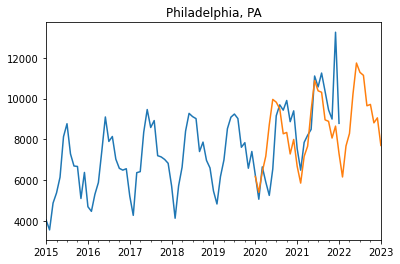

In [623]:
for x in ts.columns[5:6]:
    optimized_sm = SARIMAX(ts[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

    ts[x]['2015':].plot()
    ax = optimized_sm.predict(start="2020", end="2023").plot()
    ax.set_title(x);

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


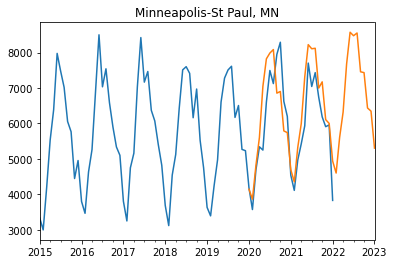

In [624]:
for x in ts.columns[16:17]:
    optimized_sm = SARIMAX(ts[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

    ts[x]['2015':].plot()
    ax = optimized_sm.predict(start="2020", end="2023").plot()
    ax.set_title(x);

In [625]:
from sklearn.preprocessing import StandardScaler

In [633]:
ss = StandardScaler()
scaled_ts = ss.fit_transform(ts[:-1])
scaled_df = pd.DataFrame(scaled_ts)
scaled_df.set_index(ts[:-1].index, inplace=True)
scaled_df.columns = ts.columns
scaled_df

RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Boise City, ID","Toledo, OH","Madison, WI","Lakeland, FL","Ogden, UT","Daytona Beach, FL","Des Moines, IA","Provo, UT","Durham, NC","Fort Collins, CO"
2008-02-29,-1.372739,-1.061162,-2.405134,-1.135079,-1.159049,-1.147900,-1.089105,-1.608519,-1.581385,-0.879296,...,-1.436800,-1.380402,-1.444047,-1.045069,-0.977690,-1.424921,-1.262459,-1.645573,-1.071210,-1.608767
2008-03-31,-1.038784,-0.891124,-1.995570,-0.863842,-0.632567,-0.725490,-0.495559,-1.241998,-1.398307,-0.708193,...,-1.144619,-1.143192,-0.948398,-0.726391,-0.603864,-1.234454,-1.117181,-1.310776,-0.566071,-1.070400
2008-04-30,-0.822264,-0.716236,-1.558594,-0.666053,-0.252687,-0.278349,-0.340938,-1.083835,-1.157368,-0.539337,...,-1.116176,-0.973757,-0.470202,-0.759801,-0.345417,-1.180676,-0.615559,-1.179996,-0.462747,-0.801216
2008-05-31,-0.637115,-0.648560,-1.293075,-0.647897,-0.130849,-0.324844,-0.168028,-0.888263,-1.175450,-0.616381,...,-0.966207,-0.722992,-0.019929,-0.867740,-0.110045,-1.037266,-0.511397,-1.038753,0.210773,-0.470640
2008-06-30,-0.488466,-0.528248,-1.221052,-0.346950,-0.037241,-0.007790,0.093553,-0.389151,-1.195792,-0.456193,...,-0.870537,-0.641663,0.521096,-0.721251,-0.456180,-1.185157,-0.196170,-1.064909,0.513091,-0.277017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31,1.615743,2.092173,1.033164,2.170111,1.355980,2.560303,2.186205,1.817075,1.922401,1.328672,...,0.657598,1.215349,1.072593,1.414409,0.811664,1.344682,1.506057,0.987216,1.022058,1.529819
2021-09-30,1.202643,1.469026,0.850956,1.927758,1.130628,2.115635,1.717908,1.059410,1.111888,0.668978,...,1.001493,1.215349,0.664206,1.391279,0.815620,1.272977,0.913978,0.984226,0.612588,1.239856
2021-10-31,0.942340,1.509291,0.700998,1.319812,0.880512,1.668000,1.353800,1.192475,0.898976,0.561437,...,0.859281,1.215349,0.407655,1.070030,0.819575,1.201272,0.861897,0.981237,0.643203,0.949894
2021-11-30,0.766606,1.008639,0.382268,0.639243,0.647235,1.445418,1.168697,1.308492,0.997973,0.358874,...,0.587785,1.215349,0.151105,1.451674,0.823531,1.093715,0.423320,0.978248,0.643203,0.659931


/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


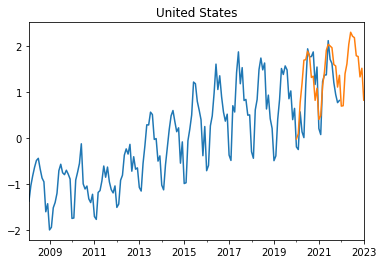

In [634]:
optimized_sm = SARIMAX(scaled_df['United States'][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

scaled_df['United States'].plot()
ax = optimized_sm.predict(start="2020", end="2023").plot()
ax.set_title('United States');

In [698]:
from sklearn.linear_model import LinearRegression

##### This cell takes a long time to run

In [669]:
arr = []
for x in scaled_df.columns:
    sarimax_test = SARIMAX(scaled_df[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()
    
    lr = LinearRegression()
    z = pd.DataFrame(sarimax_test.predict(start='2020', end='2021'))
    y = z.index
    lr.fit(z.values, y)
    arr.append((x, lr.coef_[0]))
    
    
slope_test_df = pd.DataFrame(arr)
    

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was prov

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was prov

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was prov

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was prov

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate st

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was prov

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was prov

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate st

In [691]:
slope_test_df.sort_values(1).head(25)

,0,1
78,"Fort Myers, FL",-3.686216e+15
52,"Tucson, AZ",-4.383076e+14
71,"North Port-Sarasota-Bradenton, FL",-2.586283e+14
66,"Baton Rouge, LA",-2.500386e+14
81,"Madison, WI",-1.722692e+14
54,"Tulsa, OK",-5.532851e+13
34,"San Jose, CA",1.829861e+14
35,"Austin, TX",3.040601e+14
14,"Phoenix, AZ",3.144003e+14
49,"Salt Lake City, UT",4.597291e+14


/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


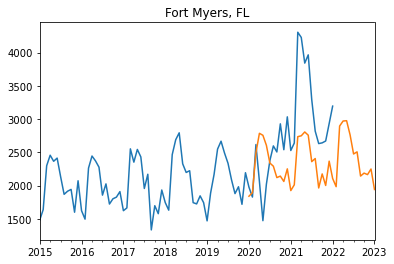

In [694]:
for x in ['Fort Myers, FL']:
    optimized_sm = SARIMAX(ts[x]['2015':'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

    ts[x]['2015':].plot()
    ax = optimized_sm.predict(start="2020", end="2023").plot()
    ax.set_title(x);

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


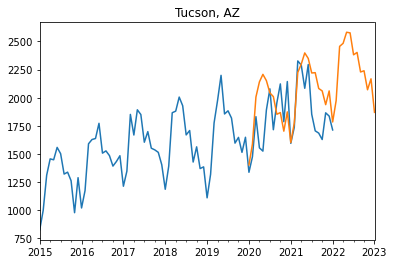

In [682]:
for x in ['Tucson, AZ']:
    optimized_sm = SARIMAX(ts[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

    ts[x]['2015':].plot()
    ax = optimized_sm.predict(start="2020", end="2023").plot()
    ax.set_title(x);

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


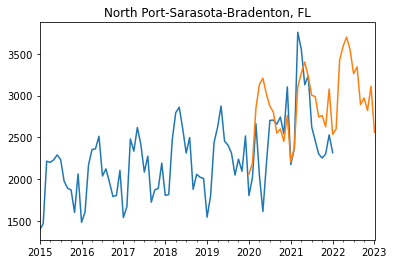

In [683]:
for x in ['North Port-Sarasota-Bradenton, FL']:
    optimized_sm = SARIMAX(ts[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

    ts[x]['2015':].plot()
    ax = optimized_sm.predict(start="2020", end="2023").plot()
    ax.set_title(x);

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


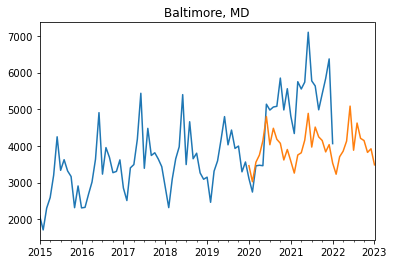

In [684]:
for x in ['Baltimore, MD']:
    optimized_sm = SARIMAX(ts[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

    ts[x]['2015':].plot()
    ax = optimized_sm.predict(start="2020", end="2023").plot()
    ax.set_title(x);

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


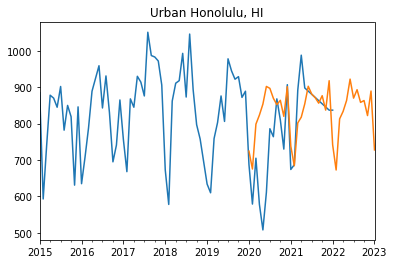

In [685]:
for x in ['Urban Honolulu, HI']:
    optimized_sm = SARIMAX(ts[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

    ts[x]['2015':].plot()
    ax = optimized_sm.predict(start="2020", end="2023").plot()
    ax.set_title(x);

/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/blackwoodbs/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


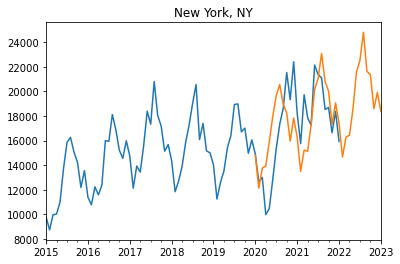

In [686]:
for x in ['New York, NY']:
    optimized_sm = SARIMAX(ts[x][:'2019'], order=(0,1,0), seasonal_order=seasonal_ord).fit()

    ts[x]['2015':].plot()
    ax = optimized_sm.predict(start="2020", end="2023").plot()
    ax.set_title(x);

In [664]:
lr = LinearRegression()
x = pd.DataFrame(sarimax_test.predict(start='2020', end='2021'))
y = x.index
lr.fit(x.values, y)
lr.coef_


array([1.09181497e+16])